In [11]:
import numpy as np 
import pandas as pd
import xarray as xr 
import rioxarray

import os 

ModuleNotFoundError: No module named 'rioxarray'

Grid point max total rainfall for 20251201:
168.59999
Grid point max total rainfall for 20251202:
170.65
Grid point max total rainfall for 20251203:
177.90001
Grid point max total rainfall for 20251204:
182.4
Grid point max total rainfall for 20251205:
226.5
Grid point max total rainfall for 20251206:
228.9
Grid point max total rainfall for 20251207:
256.6
Grid point max total rainfall for 20251208:
288.1
Grid point max total rainfall for 20251209:
432.09998
Grid point max total rainfall for 20251210:
523.8
Grid point max total rainfall for 20251211:
650.8999
Grid point max total rainfall for 20251212:
687.9999
Grid point max total rainfall for 20251213:
689.9999
Grid point max total rainfall for 20251214:
689.9999
Grid point max total rainfall for 20251215:
768.0999


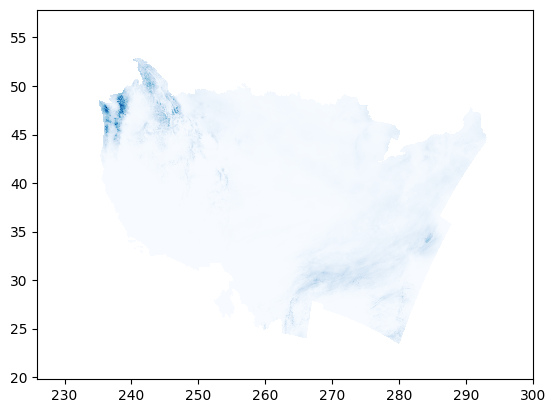

In [10]:
# Calculate rainfall accumuation: Stage IV analysis 
data_dir = '/home/orca/data/in_situ/NCEP_stageIV_QPE/rt'
date_list = pd.date_range(start='2025-12-01', end='2025-12-15', freq='24h')

# Get lat/lon from one historical data file.
fn = os.path.join(
    '/home/orca/data/in_situ/NCEP_stageIV_QPE/2025/daily',
    'st4_conus.2025010112.24h.nc')

with xr.open_dataset(fn) as ds:
    lats = ds['latitude'].data
    lons = ds['longitude'].data

for tt, date in enumerate(date_list):
    date_str = date.strftime('%Y%m%d')
    file_path = os.path.join(data_dir, f'nws_precip_1day_{date_str}_conus.nc')
    
    with xr.open_dataset(file_path) as ds:

        precip_this_day = ds['observation'].data[::-1,:] * 25.4  # inches --> mm
        precip_this_day[precip_this_day < -9000.0] = np.nan
        if tt == 0:
            precip = precip_this_day
        else:
            precip += precip_this_day
        
        # Save or process total_rainfall as needed
        print(f'Grid point max total rainfall for {date_str}:')
        print(np.nanmax(precip))

plt.pcolormesh(lons, lats, precip, cmap='Blues')